# Definição do problema: Prever se um cliente irá cancelar o serviço

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [3]:
dados = pd.read_csv('projeto4_telecom_treino.csv')

In [4]:
dados.shape

(3333, 21)

In [5]:
dados.columns

Index(['Unnamed: 0', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [6]:
dados.sample(10)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2322,2323,GA,109,area_code_510,no,yes,35,230.5,116,39.19,...,130,22.59,269.7,69,12.14,10.6,6,2.86,5,no
832,833,SC,87,area_code_408,no,no,0,322.5,106,54.83,...,93,17.39,186.2,128,8.38,9.4,4,2.54,2,yes
1585,1586,NJ,85,area_code_415,no,no,0,236.9,93,40.27,...,113,16.80,309.1,78,13.91,11.4,7,3.08,2,yes
1938,1939,OR,155,area_code_408,no,yes,30,128.5,86,21.85,...,91,16.01,254.4,85,11.45,6.8,6,1.84,1,no
3329,3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
1309,1310,NY,137,area_code_415,yes,no,0,174.0,123,29.58,...,115,13.71,260.7,98,11.73,11.4,3,3.08,2,no
2297,2298,MO,136,area_code_415,no,no,0,92.4,109,15.71,...,115,18.62,212.6,80,9.57,12.9,4,3.48,2,no
1971,1972,KS,74,area_code_415,no,yes,32,174.6,107,29.68,...,115,26.40,234.7,92,10.56,9.0,4,2.43,1,no
243,244,WV,85,area_code_408,no,no,0,225.0,81,38.25,...,63,15.04,194.3,110,8.74,7.1,2,1.92,3,no
650,651,NY,140,area_code_415,no,no,0,235.5,81,40.04,...,130,21.86,103.1,111,4.64,11.5,4,3.11,2,no


In [7]:
dados.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [8]:
# Removendo a coluna que indicava index
dados.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
# Variáveis categóricas
dados.dtypes[dados.dtypes == 'object']

state                 object
area_code             object
international_plan    object
voice_mail_plan       object
churn                 object
dtype: object

In [10]:
dados.describe()
#Verifico que a maioria das variaveis náo categóricas tem uma mediana próxima da média, indicando distribuições próximas a distribuição normal

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


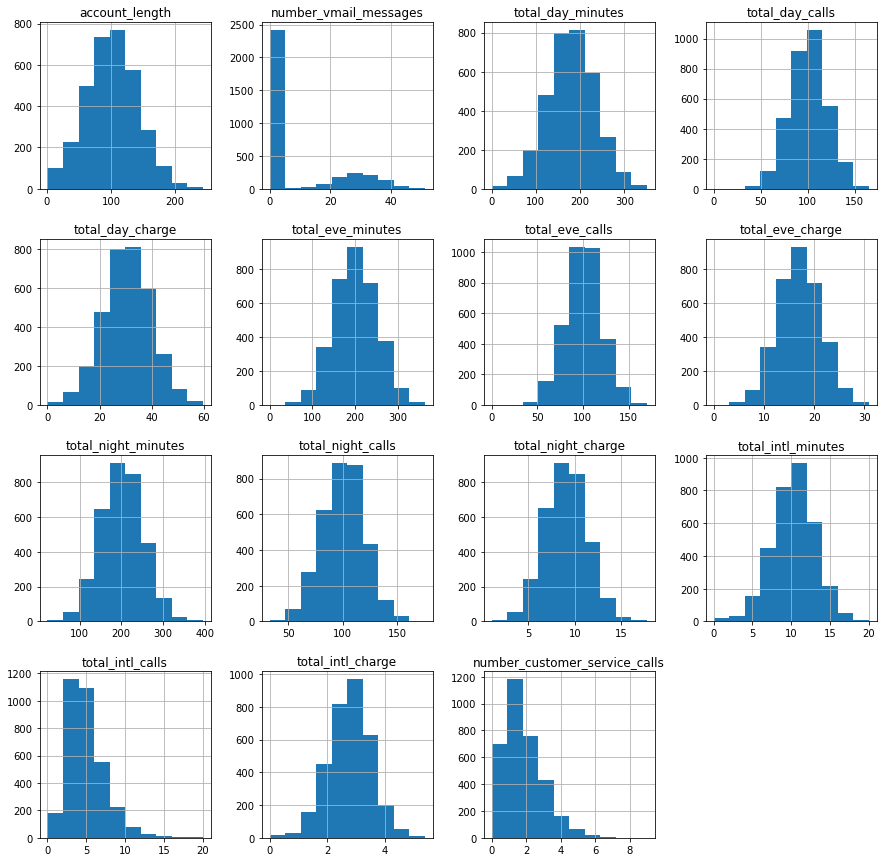

In [11]:
# Plot 
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

In [12]:
dados.describe(include = ['object'])

,state,area_code,international_plan,voice_mail_plan,churn
count,3333,3333,3333,3333,3333
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,106,1655,3010,2411,2850


In [13]:
# Verificando valores ausentes
dados[dados.isnull().values]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [14]:
# Verificando registros duplicados (complete cases)
# Complete cases também se refere a linhas onde não há valores ausentes
dados[dados.duplicated(keep = False)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


## Não há valores duplicados ou ausentes.

In [15]:
# Ajustar a variáveis para poder verificar a correlação
def ajusta_var(x):
    if x == "yes":
        return 1
    return 0
dados['churn'] = dados['churn'].map(ajusta_var)
dados['international_plan'] = dados['international_plan'].map(ajusta_var)
dados['voice_mail_plan'] = dados['voice_mail_plan'].map(ajusta_var)
dados.rename({'churn':'Target'}, axis = 'columns', inplace = True)
# Correlação entre as variáveis
dados.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Target
account_length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
international_plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice_mail_plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number_vmail_messages,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


As variações das váriaveis que terminam com **_minutes** tem alta correlação com variações **_charge** e possuem correlações 
semelhantes referente a target.Terei de utilizar apenas 1 delas.

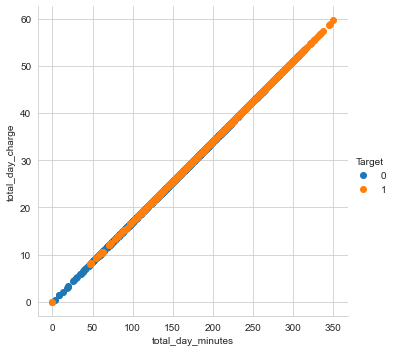

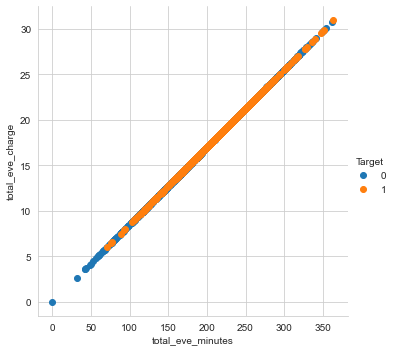

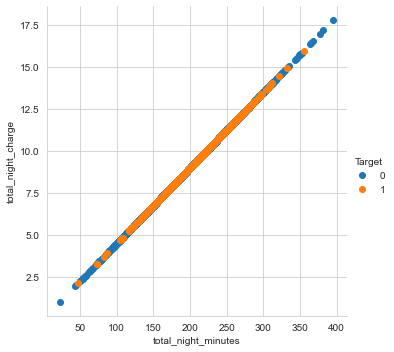

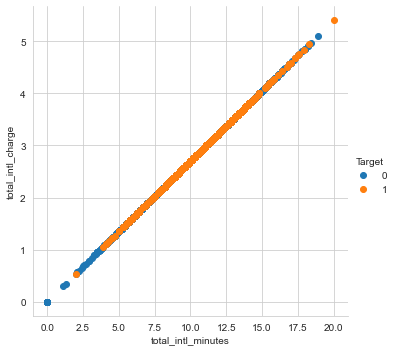

In [16]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'total_day_minutes', 'total_day_charge').add_legend()
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'total_eve_minutes', 'total_eve_charge').add_legend()
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'total_night_minutes', 'total_night_charge').add_legend()
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'total_intl_minutes', 'total_intl_charge').add_legend()

As variáveis de minutos, ligações e cobrança foram divididas por período do dia e internacional.
Suponho que a junção destas variáveis podem apresentar uma maior correlação com a target.

In [17]:
#Criando novas variaveis que somam os valores de minutos, ligacoes e cobranca da variaveis.
dados['total_minutes'] = dados['total_day_minutes'] + dados['total_eve_minutes'] +dados['total_night_minutes'] +dados['total_intl_minutes']
dados['total_calls'] = dados['total_day_calls'] + dados['total_eve_calls'] +dados['total_night_calls'] +dados['total_intl_calls']
dados['total_charge'] = dados['total_day_charge'] + dados['total_eve_charge'] +dados['total_night_charge'] +dados['total_intl_charge']

In [18]:
#Criando novas variaveis ponderadas com as correlacoes
dados['total_minutes_weighted'] = (dados['total_day_minutes']*0.213878) + (dados['total_eve_minutes']*0.081612) + (dados['total_night_minutes']*0.066204) + (dados['total_intl_minutes']*0.053308)
dados['total_calls_weighted'] = (dados['total_day_calls']*0.009864) + (dados['total_eve_calls']*-0.038537) + (dados['total_night_calls']*-0.033161) + (dados['total_intl_calls']*-0.035723)
dados['total_charge_weighted'] = (dados['total_day_charge']*0.213862) + (dados['total_eve_charge']*0.081613) + (dados['total_night_charge']*0.066187) + (dados['total_intl_charge']*0.053234)

In [19]:
dados.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_intl_calls,total_intl_charge,number_customer_service_calls,Target,total_minutes,total_calls,total_charge,total_minutes_weighted,total_calls_weighted,total_charge_weighted
account_length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,...,0.020661,0.009546,-0.003796,0.016541,-0.004785,0.027542,0.001454,0.001237,-0.000423,0.004440
international_plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,...,0.017366,0.045780,-0.024522,0.259852,0.025850,0.014037,0.048415,0.043992,-0.013104,0.050519
voice_mail_plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,...,0.007618,-0.001276,-0.017824,-0.102148,0.014503,-0.000807,0.008585,0.006991,-0.007741,0.002530
number_vmail_messages,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,...,0.013957,0.002884,-0.013263,-0.089728,0.014779,-0.003911,0.009766,0.008408,-0.003129,0.004451
total_day_minutes,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,...,0.008033,-0.010092,-0.013423,0.205151,0.611587,0.026676,0.884754,0.911081,-0.025501,0.981908
total_day_calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,...,0.004574,0.021666,-0.018942,0.018459,0.005559,0.575542,0.003673,0.005444,0.198420,0.005026
total_day_charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,...,0.008032,-0.010094,-0.013427,0.205151,0.611591,0.026678,0.884757,0.911083,-0.025501,0.981909
total_eve_minutes,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,...,0.002541,-0.011067,-0.012985,0.092796,0.560621,-0.014617,0.413143,0.325510,-0.000596,0.179959
total_eve_calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,...,0.017434,0.008674,0.002423,0.009233,0.002198,0.587726,0.009392,0.010183,-0.747150,0.013492
total_eve_charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,...,0.002541,-0.011074,-0.012987,0.092786,0.560608,-0.014606,0.413129,0.325496,-0.000608,0.179945


A correlacao da variavel **total_charge** é maior que as outras variáveis criadas e originais, assim utilizarei apenas ela.

In [20]:
dados_featureSelection = dados.drop(dados.columns[[6,7,8,9,10,11,12,13,14,15,16,17,20,21,23,24,25]], axis=1)
dados.sample(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,number_customer_service_calls,Target,total_minutes,total_calls,total_charge,total_minutes_weighted,total_calls_weighted,total_charge_weighted
1087,FL,109,area_code_408,0,0,0,217.0,115,36.89,207.0,...,4,2.21,1,0,700.2,367,68.76,81.485008,-7.995852,10.241620
3133,CT,147,area_code_415,0,0,0,124.4,74,21.15,320.9,...,4,2.81,2,0,612.9,282,58.31,63.757386,-6.597128,7.367114
584,SD,104,area_code_510,0,0,0,234.2,128,39.81,293.1,...,6,2.65,0,1,721.0,305,75.65,86.708039,-5.116869,11.235925


In [21]:
dados_featureSelection.sample(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Target,total_charge
2683,CT,77,area_code_415,0,0,0,1,0,64.84
931,WV,77,area_code_510,0,0,0,1,0,42.02
2362,ND,101,area_code_415,0,0,0,3,0,65.04


In [22]:
dados_featureSelection.describe(include = ['object'])

,state,area_code
count,3333,3333
unique,51,3
top,WV,area_code_415
freq,106,1655


In [23]:
#Irei transformar as variáveis categóricas restantes
dados_featureSelection["area_code"].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [24]:
def ajusta_area(x):
    if x != 'area_code_510':
        if x != 'area_code_408':
            return 1
        else:
            return 2
    return 3
dados_featureSelection['area_code'] = dados_featureSelection['area_code'].map(ajusta_area)
labelencoder = LabelEncoder()
dados_featureSelection['state'] = labelencoder.fit_transform(dados_featureSelection['state'])
dados_featureSelection

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Target,total_charge
0,16,128,1,0,1,25,1,0,75.56
1,35,107,1,0,1,26,1,0,59.24
2,31,137,1,0,0,0,0,0,62.29
3,35,84,2,1,0,0,2,0,66.80
4,36,75,1,1,0,0,3,0,52.09
...,...,...,...,...,...,...,...,...,...
3328,3,192,1,0,1,36,2,0,60.10
3329,49,68,1,0,0,0,3,0,63.53
3330,39,28,3,0,0,0,2,0,67.74
3331,6,184,3,1,0,0,2,0,57.53


In [25]:
dados_featureSelection.corr()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Target,total_charge
state,1.000000,0.003678,0.011180,-0.004597,-0.031664,-0.027762,-0.025861,0.007780,0.004437
account_length,0.003678,1.000000,-0.006303,0.024735,0.002918,-0.004628,-0.003796,0.016541,0.001454
area_code,0.011180,-0.006303,1.000000,0.037860,-0.011757,-0.013083,0.018066,0.007297,-0.026254
international_plan,-0.004597,0.024735,0.037860,1.000000,0.006006,0.008745,-0.024522,0.259852,0.048415
voice_mail_plan,-0.031664,0.002918,-0.011757,0.006006,1.000000,0.956927,-0.017824,-0.102148,0.008585
number_vmail_messages,-0.027762,-0.004628,-0.013083,0.008745,0.956927,1.000000,-0.013263,-0.089728,0.009766
number_customer_service_calls,-0.025861,-0.003796,0.018066,-0.024522,-0.017824,-0.013263,1.000000,0.208750,-0.019873
Target,0.007780,0.016541,0.007297,0.259852,-0.102148,-0.089728,0.208750,1.000000,0.231549
total_charge,0.004437,0.001454,-0.026254,0.048415,0.008585,0.009766,-0.019873,0.231549,1.000000


In [26]:
# Cria um objeto separado para a variável target
y_treino = dados_featureSelection.Target
# Cria um objeto separadado para as variáveis de entrada
X = dados_featureSelection.drop('Target', axis = 1)
X_treino = dados_featureSelection.drop('Target', axis = 1)
#Verificando o balanceamento da Classe target
y_treino.value_counts()

0    2850
1     483
Name: Target, dtype: int64

In [27]:
# Carregando, transformando e separando os dados de teste
dados_teste = pd.read_csv('projeto4_telecom_teste.csv')
dados_teste.drop(columns=['Unnamed: 0'],inplace=True)
dados_teste['churn'] = dados_teste['churn'].map(ajusta_var)
dados_teste['international_plan'] = dados_teste['international_plan'].map(ajusta_var)
dados_teste['voice_mail_plan'] = dados_teste['voice_mail_plan'].map(ajusta_var)
dados_teste.rename({'churn':'Target'}, axis = 'columns', inplace = True)
dados_teste['total_minutes'] = dados_teste['total_day_minutes'] + dados_teste['total_eve_minutes'] +dados_teste['total_night_minutes'] +dados_teste['total_intl_minutes']
dados_teste['total_calls'] = dados_teste['total_day_calls'] + dados_teste['total_eve_calls'] +dados_teste['total_night_calls'] +dados_teste['total_intl_calls']
dados_teste['total_charge'] = dados_teste['total_day_charge'] + dados_teste['total_eve_charge'] +dados_teste['total_night_charge'] +dados_teste['total_intl_charge']
dados_teste['total_minutes_weighted'] = (dados_teste['total_day_minutes']*0.213878) + (dados_teste['total_eve_minutes']*0.081612) + (dados_teste['total_night_minutes']*0.066204) + (dados_teste['total_intl_minutes']*0.053308)
dados_teste['total_calls_weighted'] = (dados_teste['total_day_calls']*0.009864) + (dados_teste['total_eve_calls']*-0.038537) + (dados_teste['total_night_calls']*-0.033161) + (dados_teste['total_intl_calls']*-0.035723)
dados_teste['total_charge_weighted'] = (dados_teste['total_day_charge']*0.213862) + (dados_teste['total_eve_charge']*0.081613) + (dados_teste['total_night_charge']*0.066187) + (dados_teste['total_intl_charge']*0.053234)
dados_teste = dados_teste.drop(dados_teste.columns[[6,7,8,9,10,11,12,13,14,15,16,17,20,21,23,24,25]], axis=1)
dados_teste['area_code'] = dados_teste['area_code'].map(ajusta_area)
dados_teste['state'] = labelencoder.transform(dados_teste['state'])
# Cria um objeto separado para a variável target
y_teste = dados_teste.Target
# Cria um objeto separadado para as variáveis de entrada
X_teste = dados_teste.drop('Target', axis = 1)

In [28]:
#Aplica a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)
X_treino, y_treino = over_sampler.fit_resample(X_treino, y_treino)
#Aplicar a técnica de padronização dos dados
scaler = StandardScaler()
scaler.fit(X_treino)
X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

# Criação de modelos

### LogisticRegression

In [29]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}
# Criando o modelo com GridSearch 
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=10)

In [30]:
# Construindo o modelo novamente com os melhores hiperparâmetros
# Isso é necessário pois a versão final não deve ter o GridSearchCV
modelo_v1 = LogisticRegression(C = 10)
modelo_v1.fit(X_treino, y_treino)
# Obtemos os coeficientes pelo maior maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
total_charge
voice_mail_plan
number_customer_service_calls
number_vmail_messages
area_code
international_plan
account_length
state


In [31]:
# Previsões
y_pred_v1 = modelo_v1.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)
# Calcula AUC score
auc_v1 = auc(fpr_v1, tpr_v1)
# Calcula acurácia
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística',
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

### RandomForest

In [32]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)
# Treina o modelo
modelo_v2.fit(X_treino, y_treino)
# Extrai o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=200)

In [33]:
# Recria o modelo com os melhores hiperparâmetros
# n_estimators = 200, min_samples_split = 5
modelo_v2 = RandomForestClassifier()
modelo_v2.fit(X_treino, y_treino)
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
total_charge
account_length
state
number_customer_service_calls
number_vmail_messages
area_code
international_plan
voice_mail_plan


In [34]:
# Previsões
y_pred_v2 = modelo_v2.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)
# Calcula AUC score
auc_v2 = auc(fpr_v2, tpr_v2)
# Calcula acurácia
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest',
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

### KNN

In [35]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))
# Lista para os scores
cv_scores = []
# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'roc_auc')
    cv_scores.append(scores.mean())   
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]
# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

O valor ideal de k é 7


In [36]:
# Criamos o modelo versão 3
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)
# Treinamento
modelo_v3.fit(X_treino, y_treino)
# Previsões
y_pred_v3 = modelo_v3.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)
# Calcula AUC score
auc_v3 = auc(fpr_v3, tpr_v3)
# Calcula acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
# Dicionário com as métricas do modelo_v3
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN',
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

### DecisionTree

In [37]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}
# Cria o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)
# Treinamento
modelo_v4.fit(X_treino, y_treino)
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=7)

In [38]:
# Recriando o modelo
modelo_v4 = DecisionTreeClassifier(min_samples_split = 3, max_depth = 7, min_samples_leaf=2)
modelo_v4.fit(X_treino, y_treino)
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
total_charge
number_customer_service_calls
international_plan
voice_mail_plan
account_length
area_code
state
number_vmail_messages


In [39]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)
# Calcula AUC score
auc_v4 = auc(fpr_v4, tpr_v4)
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
# Dicionário com as métricas do modelo_v4
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree',
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

### SVC

In [40]:
# Função para seleção de hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_
# Aplica a função
svc_param_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [41]:
# Cria o modelo com os melhores hiperparâmetros
modelo_v5 = SVC(C = 10, gamma = 1, probability = True)
# Treinamento
modelo_v5.fit(X_treino, y_treino)
# Previsões de classe
y_pred_v5 = modelo_v5.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)
# Calcula AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
# Calcula acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
# Dicionário com as métricas do modelo_v5
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'SVM',
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

### XGBoost

In [42]:
param_grid = { 
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
scoring = ['roc_auc']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
xgboost = XGBClassifier(seed=0).fit(X_treino,y_treino)
# Define random search
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
random_result = random_search.fit(X_treino, y_treino)
# Print the best score and the corresponding hyperparameters
print(f'The best score is {random_result.best_score_:.4f}')
print(f'The best hyperparameters are {random_result.best_params_}')

The best score is 0.9596
The best hyperparameters are {'reg_lambda': 10, 'reg_alpha': 1, 'max_depth': 18, 'learning_rate': 1, 'gamma': 0.2, 'colsample_bytree': 0.4}


In [43]:
# Recriando o modelo
modelo_v6 = XGBClassifier(reg_lambda = 0.00001, reg_alpha = 0.1,max_depth = 12,learning_rate = 0.1,gamma = 0.4,colsample_bytree = 0.5)
modelo_v6.fit(X_treino, y_treino)
# Variáveis mais importantes
indices = np.argsort(-modelo_v6.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v6:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v6:
--------------------------------------------------
international_plan
voice_mail_plan
number_customer_service_calls
total_charge
area_code
number_vmail_messages
account_length
state


In [44]:
# Previsões de classe
y_pred_v6 = modelo_v6.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v6 = modelo_v6.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v6, tpr_v6, thresholds = roc_curve(y_teste, y_pred_proba_v6)
# Calcula AUC score
auc_v6 = auc(fpr_v6, tpr_v6)
# Calcula acurácia
acuracia_v6 = accuracy_score(y_teste, y_pred_v6)
# Dicionário com as métricas do modelo_v6
dict_modelo_v6 = {'Nome': 'modelo_v6', 
                  'Algoritmo': 'XGBoost',
                  'AUC Score': auc_v6,
                  'Acurácia': acuracia_v6}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v6, ignore_index = True)
display(df_modelos)

,Nome,Algoritmo,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.807500,0.701260
1,modelo_v2,Random Forest,0.895321,0.919616
2,modelo_v3,KNN,0.829404,0.785243
3,modelo_v4,Decision Tree,0.863938,0.925015
4,modelo_v5,SVM,0.839473,0.838032
5,modelo_v6,XGBoost,0.867358,0.909418


### Seguirei tentando otimizar os 3 melhores modelos, baseado no AUC

Suponho que removendo as variáveis **state** e **area_code** a performance dos modelos aumente, pois as mesmas foram indicadas como pouco importantes para os resultados de 2 dos 3 melhores algoritmos.

In [45]:
dados_otimiza = dados_featureSelection.drop(dados.columns[[0,2]], axis=1)
dados_otimiza_teste = dados_teste.drop(dados.columns[[0,2]], axis=1)
dados_otimiza.sample(3)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Target,total_charge
2065,113,0,0,0,1,0,61.75
1677,123,0,0,0,1,0,58.93
2910,123,0,0,0,2,0,55.08


In [46]:
y_treino = dados_otimiza.Target
X_treino = dados_otimiza.drop('Target', axis = 1)

y_teste = dados_otimiza_teste.Target
X_teste = dados_otimiza_teste.drop('Target', axis = 1)

#Aplica a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)
X_treino, y_treino = over_sampler.fit_resample(X_treino, y_treino)
#Aplicar a técnica de padronização dos dados
scaler = StandardScaler()
scaler.fit(X_treino)
X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

## Criando novas versões do Modelo

### Otimizando RandomForest

In [47]:
tuned_params_v2_1 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}
modelo_v2_1 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2_1, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)
modelo_v2_1.fit(X_treino, y_treino)
modelo_v2_1.best_estimator_

RandomForestClassifier(n_estimators=500)

In [48]:
modelo_v2_1 = RandomForestClassifier(n_estimators = 500)
modelo_v2_1.fit(X_treino, y_treino)
y_pred_v2_1 = modelo_v2_1.predict(X_teste)
y_pred_proba_v2_1 = modelo_v2_1.predict_proba(X_teste)[:, 1]
fpr_v2_1, tpr_v2_1, thresholds = roc_curve(y_teste, y_pred_proba_v2_1)
auc_v2_1 = auc(fpr_v2_1, tpr_v2_1)
acuracia_v2_1 = accuracy_score(y_teste, y_pred_v2_1)
dict_modelo_v2_1 = {'Nome': 'modelo_v2_1', 
                  'Algoritmo': 'Random Forest',
                  'AUC Score': auc_v2_1,
                  'Acurácia': acuracia_v2_1}
df_modelos = df_modelos.append(dict_modelo_v2_1, ignore_index = True)

### Otimizando DecisionTree

In [49]:
tuned_params_v4_1 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}
modelo_v4_1 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4_1, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)
modelo_v4_1.fit(X_treino, y_treino)
modelo_v4_1.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=7)

In [50]:
modelo_v4_1 = DecisionTreeClassifier(max_depth=6, min_samples_split=3)
modelo_v4_1.fit(X_treino, y_treino)
y_pred_v4_1 = modelo_v4_1.predict(X_teste)
y_pred_proba_v4_1 = modelo_v4_1.predict_proba(X_teste)[:, 1]
fpr_v4_1, tpr_v4_1, thresholds = roc_curve(y_teste, y_pred_proba_v4_1)
auc_v4_1 = auc(fpr_v4_1, tpr_v4_1)
acuracia_v4_1 = accuracy_score(y_teste, y_pred_v4_1)
dict_modelo_v4_1 = {'Nome': 'modelo_v4_1', 
                  'Algoritmo': 'Decision Tree',
                  'AUC Score': auc_v4_1,
                  'Acurácia': acuracia_v4_1}
df_modelos = df_modelos.append(dict_modelo_v4_1, ignore_index = True)

### Otimizando XGBoost

In [51]:
param_grid = { 
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
scoring = ['roc_auc']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
xgboost = XGBClassifier(seed=0).fit(X_treino,y_treino)
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
random_result = random_search.fit(X_treino, y_treino)
#print(f'The best hyperparameters are {random_result.best_params_}')
random_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [52]:
modelo_v6_1 = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0)
modelo_v6_1.fit(X_treino, y_treino)
y_pred_v6_1 = modelo_v6_1.predict(X_teste)
y_pred_proba_v6_1 = modelo_v6_1.predict_proba(X_teste)[:, 1]
fpr_v6_1, tpr_v6_1, thresholds = roc_curve(y_teste, y_pred_proba_v6_1)
auc_v6_1 = auc(fpr_v6_1, tpr_v6_1)
acuracia_v6_1 = accuracy_score(y_teste, y_pred_v6_1)
dict_modelo_v6_1 = {'Nome': 'modelo_v6_1', 
                  'Algoritmo': 'XGBoost',
                  'AUC Score': auc_v6_1,
                  'Acurácia': acuracia_v6_1}
df_modelos = df_modelos.append(dict_modelo_v6_1, ignore_index = True)

In [53]:
display(df_modelos)

,Nome,Algoritmo,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.807500,0.701260
1,modelo_v2,Random Forest,0.895321,0.919616
2,modelo_v3,KNN,0.829404,0.785243
3,modelo_v4,Decision Tree,0.863938,0.925015
4,modelo_v5,SVM,0.839473,0.838032
5,modelo_v6,XGBoost,0.867358,0.909418
6,modelo_v2_1,Random Forest,0.898615,0.904019
7,modelo_v4_1,Decision Tree,0.888793,0.925615
8,modelo_v6_1,XGBoost,0.874075,0.891422


2 dos novos modelos tiveram performance superior aos originais

## Tratamento de outliers

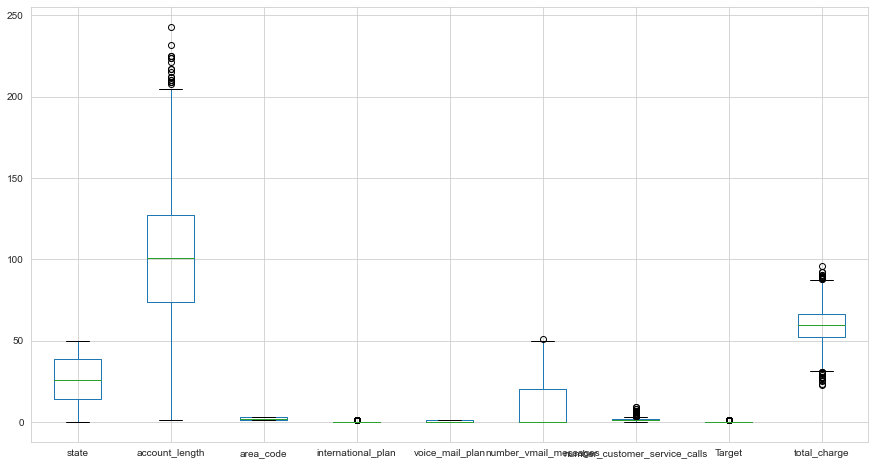

In [54]:
# plotar um boxplot para analisar presença de outliers no dataset
colunas = dados_featureSelection.columns.to_list()
plt.figure(figsize=(15,8))
dados_featureSelection.boxplot(column = colunas[:])
plt.show()

<AxesSubplot:xlabel='account_length'>

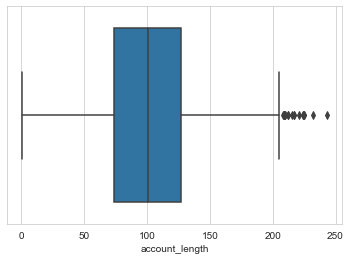

In [55]:
# Boxplot para avaliar atributo que aparenta ter o maior numero de outliers
sns.boxplot(dados_featureSelection.account_length)

In [56]:
dados_featureSelection.account_length.sort_values(ascending = False).head(10)

817     243
1408    232
1751    225
1551    225
1886    224
416     224
3216    221
2277    217
1045    217
238     215
Name: account_length, dtype: int64

<AxesSubplot:xlabel='number_customer_service_calls'>

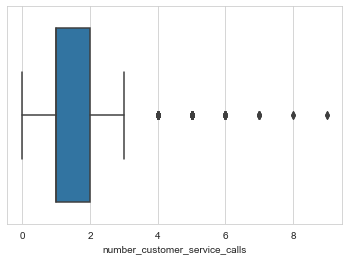

In [57]:
# Boxplot para avaliar atributo que aparenta ter o maior numero de outliers
sns.boxplot(dados_featureSelection.number_customer_service_calls)

In [58]:
dados_featureSelection.number_customer_service_calls.sort_values(ascending = False).head(130)

542     9
2380    9
1502    8
1912    8
902     7
       ..
865     4
366     4
1765    4
1531    4
521     4
Name: number_customer_service_calls, Length: 130, dtype: int64

<AxesSubplot:xlabel='total_charge'>

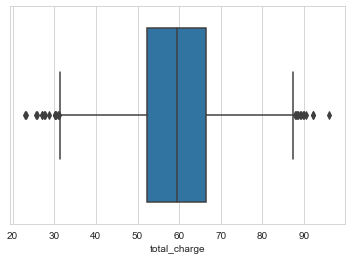

In [59]:
# Boxplot para avaliar atributo que aparenta ter o maior numero de outliers
sns.boxplot(dados_featureSelection.total_charge)

In [60]:
dados_featureSelection.total_charge.sort_values(ascending = False).head(10)

985     96.15
15      92.29
365     92.20
605     90.46
2629    90.12
3205    89.76
289     89.31
2594    88.97
1679    88.66
3322    88.39
Name: total_charge, dtype: float64

In [61]:
dados_featureSelection.total_charge.sort_values(ascending = True).head(15)

1345    22.93
1986    23.25
1621    25.52
1397    25.87
77      27.02
2859    27.08
648     27.54
2753    27.77
2252    28.73
523     30.04
2241    30.18
2996    30.21
2707    30.48
1538    30.83
181     31.05
Name: total_charge, dtype: float64

Entendo que o atributo **number_vmail_messages** apresenta outliers esperados para a área de negócios.
Os atributos **account_length**, **number_customer_service_calls** e **total_charge** apresentam outliers mais excepcionais que podem impactar a performance do modelo.
Irei tratar em datasets separados para poder avaliar qual o impacto deles.

In [62]:
dados_outlier_1 = dados_featureSelection[dados_featureSelection.account_length <= 202]
dados_outlier_2 = dados_featureSelection[dados_featureSelection.number_customer_service_calls <= 3]
dados_outlier_3 = dados_featureSelection[dados_featureSelection.total_charge <= 85]
dados_outlier_3 = dados_outlier_3[dados_outlier_3.total_charge >= 35]

In [63]:
# Cria um objeto separado para a variável target
y1_treino = dados_outlier_1.Target
# Cria um objeto separadado para as variáveis de entrada
X1_treino = dados_outlier_1.drop('Target', axis = 1)

y1_teste = dados_teste.Target
X1_teste = dados_teste.drop('Target', axis = 1)

#Aplica a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)
X1_treino, y1_treino = over_sampler.fit_resample(X1_treino, y1_treino)
#Aplicar a técnica de padronização dos dados
scaler = StandardScaler()
scaler.fit(X1_treino)
X1_treino = scaler.transform(X1_treino)
X1_teste = scaler.transform(X1_teste)

In [64]:
# Cria um objeto separado para a variável target
y2_treino = dados_outlier_2.Target
# Cria um objeto separadado para as variáveis de entrada
X2_treino = dados_outlier_2.drop('Target', axis = 1)

y2_teste = dados_teste.Target
X2_teste = dados_teste.drop('Target', axis = 1)

#Aplica a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)
X2_treino, y2_treino = over_sampler.fit_resample(X2_treino, y2_treino)
#Aplicar a técnica de padronização dos dados
scaler = StandardScaler()
scaler.fit(X2_treino)
X2_treino = scaler.transform(X2_treino)
X2_teste = scaler.transform(X2_teste)

In [65]:
# Cria um objeto separado para a variável target
y3_treino = dados_outlier_3.Target
# Cria um objeto separadado para as variáveis de entrada
X3_treino = dados_outlier_3.drop('Target', axis = 1)

y3_teste = dados_teste.Target
X3_teste = dados_teste.drop('Target', axis = 1)

#Aplica a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)
X3_treino, y3_treino = over_sampler.fit_resample(X3_treino, y3_treino)
#Aplicar a técnica de padronização dos dados
scaler = StandardScaler()
scaler.fit(X3_treino)
X3_treino = scaler.transform(X3_treino)
X3_teste = scaler.transform(X3_teste)

## Criando novas versões do Modelo

### Otimizando RandomForest

In [66]:
tuned_params_v2_2_1 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}
modelo_v2_2_1 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2_2_1, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)
modelo_v2_2_1.fit(X1_treino, y1_treino)
modelo_v2_2_1.best_estimator_

RandomForestClassifier(n_estimators=400)

In [67]:
modelo_v2_2_1 = RandomForestClassifier()
modelo_v2_2_1.fit(X1_treino, y1_treino)
y_pred_v2_2_1 = modelo_v2_2_1.predict(X1_teste)
y_pred_proba_v2_2_1 = modelo_v2_2_1.predict_proba(X1_teste)[:, 1]
fpr_v2_2_1, tpr_v2_2_1, thresholds = roc_curve(y1_teste, y_pred_proba_v2_2_1)
auc_v2_2_1 = auc(fpr_v2_2_1, tpr_v2_2_1)
acuracia_v2_2_1 = accuracy_score(y1_teste, y_pred_v2_2_1)
dict_modelo_v2_2_1 = {'Nome': 'modelo_v2_2_1', 
                  'Algoritmo': 'Random Forest',
                  'AUC Score': auc_v2_2_1,
                  'Acurácia': acuracia_v2_2_1}
df_modelos = df_modelos.append(dict_modelo_v2_2_1, ignore_index = True)

In [68]:
tuned_params_v2_2_2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}
modelo_v2_2_2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2_2_2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)
modelo_v2_2_2.fit(X2_treino, y2_treino)
modelo_v2_2_2.best_estimator_

RandomForestClassifier(n_estimators=400)

In [69]:
modelo_v2_2_2 = RandomForestClassifier(n_estimators = 300)
modelo_v2_2_2.fit(X2_treino, y2_treino)
y_pred_v2_2_2 = modelo_v2_2_2.predict(X2_teste)
y_pred_proba_v2_2_2 = modelo_v2_2_2.predict_proba(X2_teste)[:, 1]
fpr_v2_2_2, tpr_v2_2_2, thresholds = roc_curve(y2_teste, y_pred_proba_v2_2_2)
auc_v2_2_2 = auc(fpr_v2_2_2, tpr_v2_2_2)
acuracia_v2_2_2 = accuracy_score(y2_teste, y_pred_v2_2_2)
dict_modelo_v2_2_2 = {'Nome': 'modelo_v2_2_2', 
                  'Algoritmo': 'Random Forest',
                  'AUC Score': auc_v2_2_2,
                  'Acurácia': acuracia_v2_2_2}
df_modelos = df_modelos.append(dict_modelo_v2_2_2, ignore_index = True)

In [70]:
tuned_params_v2_2_3 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}
modelo_v2_2_3 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2_2_3, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)
modelo_v2_2_3.fit(X3_treino, y3_treino)
modelo_v2_2_3.best_estimator_

RandomForestClassifier(n_estimators=200)

In [71]:
modelo_v2_2_3 = RandomForestClassifier(n_estimators = 500)
modelo_v2_2_3.fit(X3_treino, y3_treino)
y_pred_v2_2_3 = modelo_v2_2_3.predict(X3_teste)
y_pred_proba_v2_2_3 = modelo_v2_2_3.predict_proba(X3_teste)[:, 1]
fpr_v2_2_3, tpr_v2_2_3, thresholds = roc_curve(y3_teste, y_pred_proba_v2_2_3)
auc_v2_2_3 = auc(fpr_v2_2_3, tpr_v2_2_3)
acuracia_v2_2_3 = accuracy_score(y3_teste, y_pred_v2_2_3)
dict_modelo_v2_2_3 = {'Nome': 'modelo_v2_2_3', 
                  'Algoritmo': 'Random Forest',
                  'AUC Score': auc_v2_2_3,
                  'Acurácia': acuracia_v2_2_3}
df_modelos = df_modelos.append(dict_modelo_v2_2_3, ignore_index = True)

### Otimizando DecisionTree

In [72]:
tuned_params_v4_2_1 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}
modelo_v4_2_1 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4_2_1, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)
modelo_v4_2_1.fit(X1_treino, y1_treino)
modelo_v4_2_1.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)

In [73]:
modelo_v4_2_1 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=4)
modelo_v4_2_1.fit(X1_treino, y1_treino)
y_pred_v4_2_1 = modelo_v4_2_1.predict(X1_teste)
y_pred_proba_v4_2_1 = modelo_v4_2_1.predict_proba(X1_teste)[:, 1]
fpr_v4_2_1, tpr_v4_2_1, thresholds = roc_curve(y1_teste, y_pred_proba_v4_2_1)
auc_v4_2_1 = auc(fpr_v4_2_1, tpr_v4_2_1)
acuracia_v4_2_1 = accuracy_score(y1_teste, y_pred_v4_2_1)
dict_modelo_v4_2_1 = {'Nome': 'modelo_v4_2_1', 
                  'Algoritmo': 'Decision Tree',
                  'AUC Score': auc_v4_2_1,
                  'Acurácia': acuracia_v4_2_1}
df_modelos = df_modelos.append(dict_modelo_v4_2_1, ignore_index = True)

In [74]:
tuned_params_v4_2_2 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}
modelo_v4_2_2 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4_2_2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)
modelo_v4_2_2.fit(X2_treino, y2_treino)
modelo_v4_2_2.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=5)

In [75]:
modelo_v4_2_2 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=7)
modelo_v4_2_2.fit(X2_treino, y2_treino)
y_pred_v4_2_2 = modelo_v4_2_2.predict(X2_teste)
y_pred_proba_v4_2_2 = modelo_v4_2_2.predict_proba(X2_teste)[:, 1]
fpr_v4_2_2, tpr_v4_2_2, thresholds = roc_curve(y2_teste, y_pred_proba_v4_2_2)
auc_v4_2_2 = auc(fpr_v4_2_2, tpr_v4_2_2)
acuracia_v4_2_2 = accuracy_score(y2_teste, y_pred_v4_2_2)
dict_modelo_v4_2_2 = {'Nome': 'modelo_v4_2_2', 
                  'Algoritmo': 'Decision Tree',
                  'AUC Score': auc_v4_2_2,
                  'Acurácia': acuracia_v4_2_2}
df_modelos = df_modelos.append(dict_modelo_v4_2_2, ignore_index = True)

In [76]:
tuned_params_v4_2_3 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}
modelo_v4_2_3 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4_2_3, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)
modelo_v4_2_3.fit(X3_treino, y3_treino)
modelo_v4_2_3.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=3)

In [77]:
modelo_v4_2_3 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5)
modelo_v4_2_3.fit(X3_treino, y3_treino)
y_pred_v4_2_3 = modelo_v4_2_3.predict(X3_teste)
y_pred_proba_v4_2_3 = modelo_v4_2_3.predict_proba(X3_teste)[:, 1]
fpr_v4_2_3, tpr_v4_2_3, thresholds = roc_curve(y3_teste, y_pred_proba_v4_2_3)
auc_v4_2_3 = auc(fpr_v4_2_3, tpr_v4_2_3)
acuracia_v4_2_3 = accuracy_score(y3_teste, y_pred_v4_2_3)
dict_modelo_v4_2_3 = {'Nome': 'modelo_v4_2_3', 
                  'Algoritmo': 'Decision Tree',
                  'AUC Score': auc_v4_2_3,
                  'Acurácia': acuracia_v4_2_3}
df_modelos = df_modelos.append(dict_modelo_v4_2_3, ignore_index = True)

### Otimizando XGBoost

In [78]:
param_grid = { 
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
scoring = ['roc_auc']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
xgboost = XGBClassifier(seed=0).fit(X1_treino,y1_treino)
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
random_result = random_search.fit(X1_treino, y1_treino)
random_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=18, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [79]:
modelo_v6_2_1 = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=18, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0)
modelo_v6_2_1.fit(X1_treino, y1_treino)
y_pred_v6_2_1 = modelo_v6_2_1.predict(X1_teste)
y_pred_proba_v6_2_1 = modelo_v6_2_1.predict_proba(X1_teste)[:, 1]
fpr_v6_2_1, tpr_v6_2_1, thresholds = roc_curve(y1_teste, y_pred_proba_v6_2_1)
auc_v6_2_1 = auc(fpr_v6_2_1, tpr_v6_2_1)
acuracia_v6_2_1 = accuracy_score(y1_teste, y_pred_v6_2_1)
dict_modelo_v6_2_1 = {'Nome': 'modelo_v6_2_1', 
                  'Algoritmo': 'XGBoost',
                  'AUC Score': auc_v6_2_1,
                  'Acurácia': acuracia_v6_2_1}
df_modelos = df_modelos.append(dict_modelo_v6_2_1, ignore_index = True)

In [80]:
xgboost = XGBClassifier(seed=0).fit(X2_treino,y2_treino)
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
random_result = random_search.fit(X2_treino, y2_treino)
random_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=18, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [81]:
modelo_v6_2_2 = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0)
modelo_v6_2_2.fit(X2_treino, y2_treino)
y_pred_v6_2_2 = modelo_v6_2_2.predict(X2_teste)
y_pred_proba_v6_2_2 = modelo_v6_2_2.predict_proba(X2_teste)[:, 1]
fpr_v6_2_2, tpr_v6_2_2, thresholds = roc_curve(y2_teste, y_pred_proba_v6_2_2)
auc_v6_2_2 = auc(fpr_v6_2_2, tpr_v6_2_2)
acuracia_v6_2_2 = accuracy_score(y2_teste, y_pred_v6_2_2)
dict_modelo_v6_2_2 = {'Nome': 'modelo_v6_2_2', 
                  'Algoritmo': 'XGBoost',
                  'AUC Score': auc_v6_2_2,
                  'Acurácia': acuracia_v6_2_2}
df_modelos = df_modelos.append(dict_modelo_v6_2_2, ignore_index = True)

In [82]:
xgboost = XGBClassifier(seed=0).fit(X3_treino,y3_treino)
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
random_result = random_search.fit(X3_treino, y3_treino)
random_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=18, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [83]:
modelo_v6_2_3 = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=12, max_leaves=0, min_child_weight=1, 
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0)
modelo_v6_2_3.fit(X3_treino, y3_treino)
y_pred_v6_2_3 = modelo_v6_2_3.predict(X3_teste)
y_pred_proba_v6_2_3 = modelo_v6_2_3.predict_proba(X3_teste)[:, 1]
fpr_v6_2_3, tpr_v6_2_3, thresholds = roc_curve(y3_teste, y_pred_proba_v6_2_3)
auc_v6_2_3 = auc(fpr_v6_2_3, tpr_v6_2_3)
acuracia_v6_2_3 = accuracy_score(y3_teste, y_pred_v6_2_3)
dict_modelo_v6_2_3 = {'Nome': 'modelo_v6_2_3', 
                  'Algoritmo': 'XGBoost',
                  'AUC Score': auc_v6_2_3,
                  'Acurácia': acuracia_v6_2_3}
df_modelos = df_modelos.append(dict_modelo_v6_2_3, ignore_index = True)

In [84]:
display(df_modelos)

,Nome,Algoritmo,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.807500,0.701260
1,modelo_v2,Random Forest,0.895321,0.919616
2,modelo_v3,KNN,0.829404,0.785243
3,modelo_v4,Decision Tree,0.863938,0.925015
4,modelo_v5,SVM,0.839473,0.838032
5,modelo_v6,XGBoost,0.867358,0.909418
6,modelo_v2_1,Random Forest,0.898615,0.904019
7,modelo_v4_1,Decision Tree,0.888793,0.925615
8,modelo_v6_1,XGBoost,0.874075,0.891422
9,modelo_v2_2_1,Random Forest,0.898972,0.923815


Os novos modelos apresentaram uma melhor performance com 2 algoritmos, porém ainda menores que o melhor modelo do outro algoritmo.

In [85]:
# Me basearei no AUC Score por se tratar de uma métrica global, ideal para comparar modelos de diferentes algoritmos
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]
df_melhor_modelo

,Nome,Algoritmo,AUC Score,Acurácia
9,modelo_v2_2_1,Random Forest,0.898972,0.923815


O modelo de melhor desempenho foi o **modelov2_1** que é do algoritmo de Random Forest removendo 2 variáveis.

In [86]:
# Previsões com dados de teste usando o modelo de melhor performance
previsoes = pd.DataFrame({'Previsao':y_pred_v2_1, 'Probabilidade':y_pred_proba_v2_1})
previsoes

,Previsao,Probabilidade
0,0,0.476
1,0,0.310
2,0,0.274
3,0,0.042
4,0,0.094
...,...,...
1662,0,0.062
1663,0,0.036
1664,0,0.038
1665,0,0.002


In [87]:
# Salva o modelo em disco
with open('modelo_v2_1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v2_1, 'modelo_v2_1.pkl') 